<a href="https://colab.research.google.com/github/sebastianrolonfiuna/PARCIAL1/blob/main/1Parcial_fiuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6
Valores únicos de PEEP: [ 0. 10.]
Valores únicos de BPM: [12. 20.]
PEEP: 0.0 BPM: 12.0 R2: 0.9975786045097723 RMSE: 224.3313246558283
PEEP: 0.0 BPM: 20.0 R2: 0.9970035350944404 RMSE: 249.5523443189021
PEEP: 10.0 BPM: 12.0 R2: 0.9981629787961455 RMSE: 195.39531247654836
PEEP: 10.0 BPM: 20.0 R2: 0.9984773587280938 RMSE: 177.89176942090614
Global R2: 0.997805619282113 RMSE: 213.55662337095012


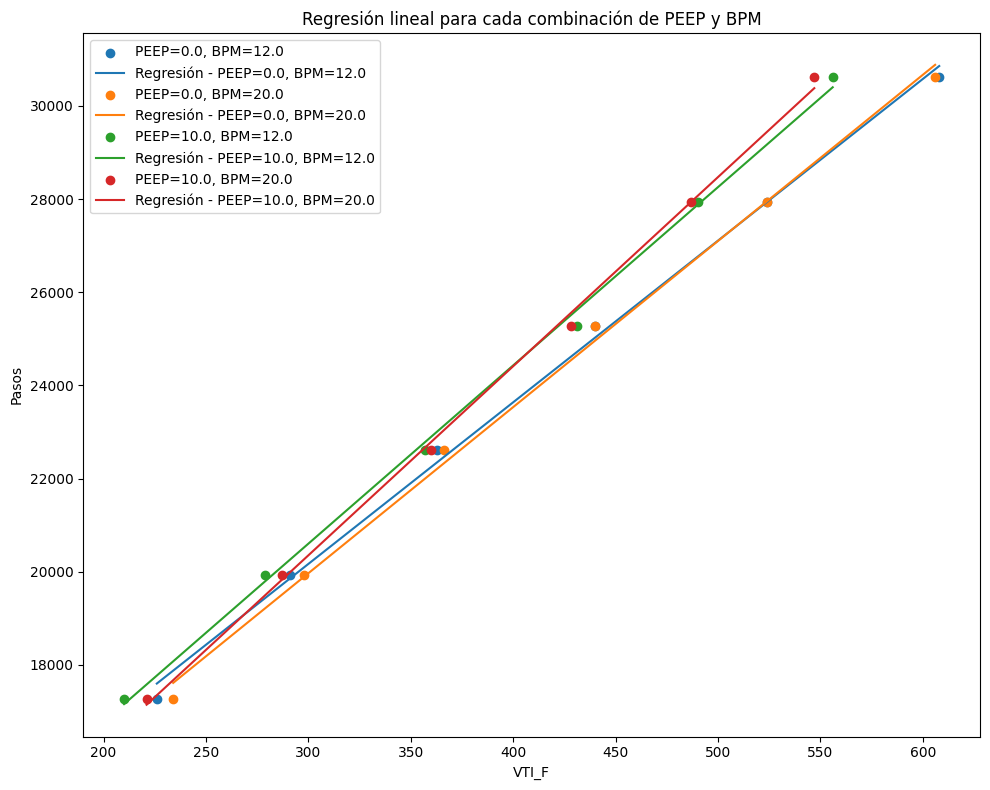

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Función para calcular los coeficientes de regresión manualmente
def regresion_manual(X, y, alpha=1e-6):
    # Agregar una columna de unos para el término independiente
    X = np.column_stack((np.ones(len(X)), X))

    # Calcular los coeficientes utilizando la fórmula de la pseudo inversa con regularización de Ridge
    n_features = X.shape[1]
    reg_term = alpha * np.eye(n_features)
    coeficientes = np.linalg.inv(X.T @ X + reg_term) @ X.T @ y

    return coeficientes




# Función para predecir los valores de y
def predecir(X, coeficientes):
    Xm = np.column_stack((np.ones(len(X)), X))
    return Xm @ coeficientes

# Calcular métricas de evaluación manualmente
def rmse(y_true, y_pred):
    error = y_true - y_pred
    return np.sqrt(np.mean(error ** 2))

def r2F(y_true, y_pred):
    numerador = ((y_true - y_pred) ** 2).sum()
    denominador = ((y_true - y_true.mean()) ** 2).sum()
    return 1 - (numerador / denominador)

# Función para ajustar el modelo y evaluarlo
def ajustar_evaluar_modelo(X, y):
    coeficientes = regresion_manual(X, y)
    y_pred = predecir(X, coeficientes)
    r2_ = r2F(y, y_pred)
    rmse_val = rmse(y, y_pred)
    return coeficientes, y_pred, r2_, rmse_val

opcion = int(input())
# Cargar los datos
data = pd.read_csv('Mediciones.csv')
data = data.dropna()

# Definir las columnas de características (X) y la columna de objetivo (y)
if opcion == 1:
    print( '(',len(data),',',len(data.columns),')')


    caracteristicas = ['VTI_F','PEEP','BPM','VTE_F']  # Seleccionar las características
    objetivo = 'Pasos'  # Seleccionar el objetivo

    print(caracteristicas)
    print(objetivo)

elif opcion == 2:
    X = data[['VTI_F']]
    y = data['Pasos']
    coef = regresion_manual(X, y)
    print(coef)

elif opcion == 3:
    X = data[['VTI_F']]
    y = data['Pasos']
    coef = regresion_manual(X, y)
    y_pred = predecir(X, coef)
    r2_ = r2F(y, y_pred)
    rmse_val = rmse(y, y_pred)
    print(coef)
    print(y[:3])
    print(y_pred[:3])
    print(r2_,rmse_val)


elif opcion == 4:
    X_todo = data[['VTI_F']]
    y = data['Pasos']
    coeficientes_todo, y_pred_todo, r2_todo, rmse_todo = ajustar_evaluar_modelo(X_todo, y)
    print("R2:", r2_todo)
    print("RMSE:", rmse_todo)

elif opcion == 5:
    models = {
        'Modelo_1': ['VTI_F'],
        'Modelo_2': ['VTI_F', 'BPM']

    }
    for nombre_modelo, lista_caracteristicas in models.items():
        X = data[lista_caracteristicas]
        y = data['Pasos']
        coeficientes, y_pred, r2, rmse_val = ajustar_evaluar_modelo(X, y)
        print(nombre_modelo, "R2:", r2, "RMSE:", rmse_val)

elif opcion == 6:
    valores_peep_unicos = data['PEEP'].unique()
    valores_bpm_unicos = data['BPM'].unique()
    print("Valores únicos de PEEP:", valores_peep_unicos)
    print("Valores únicos de BPM:", valores_bpm_unicos)

    predicciones_totales = []
    fig,ax= plt.subplots(figsize=(10,8))
    for peep in valores_peep_unicos:
        for bpm in valores_bpm_unicos:
            datos_subset = data[(data['PEEP'] == peep) & (data['BPM'] == bpm)]
            X_subset = datos_subset[['VTI_F']]
            y_subset = datos_subset['Pasos']
            coeficientes_subset, y_pred_subset, r2_subset, rmse_subset = ajustar_evaluar_modelo(X_subset, y_subset)
            print("PEEP:", peep, "BPM:", bpm, "R2:", r2_subset, "RMSE:", rmse_subset)
            predicciones_totales.append(y_pred_subset)
            ax.scatter(X_subset, y_subset, label=f"PEEP={peep}, BPM={bpm}")
            ax.plot(X_subset, y_pred_subset, label=f"Regresión - PEEP={peep}, BPM={bpm}")

    predicciones_concatenadas = np.concatenate(predicciones_totales)
    y = data['Pasos']

    r2_global = r2F(y, predicciones_concatenadas)
    rmse_global = rmse(y, predicciones_concatenadas)
    print('Global', "R2:", r2_global, "RMSE:", rmse_global)
    ax.set_xlabel('VTI_F')
    ax.set_ylabel('Pasos')
    ax.set_title('Regresión lineal para cada combinación de PEEP y BPM')
    ax.legend()
    plt.tight_layout()
    plt.show()


